# **Importing Libraries**

In [1]:
import os
import shutil
import cv2
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import skimage
from skimage.io import imshow, imread, imsave
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras as K


## Pure Images from the dataset, copied and renamed in the working directory

In [2]:
# Path to 'original' folder (read-only)
original_folder = '/kaggle/input/mydata4/Input/Original'

# Path to a writable directory
working_folder = '/kaggle/working/original_renamed/'

# Create the writable directory if it doesn't exist
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

# List all the image files in the 'original' folder
image_files = sorted(os.listdir(original_folder))

# Loop through the files, copy to writable directory, and convert to .png
for i, filename in enumerate(image_files):
    # Full path to the current file
    current_path = os.path.join(original_folder, filename)
    
    # Read the image
    image = cv2.imread(current_path)
    
    # Create a new filename with a .png extension (e.g., img_0001.png)
    new_filename = f"img_{i+1:04d}.png"
    
    # Full path to the new file in the writable directory
    new_path = os.path.join(working_folder, new_filename)
    
    # Save the image as a .png file in the writable folder
    cv2.imwrite(new_path, image)

print("All images copied and converted to .png format.")

All images copied and converted to .png format.


## Defining BHT from Wikipedia
Link :[Wikipedia BHT](https://en.wikipedia.org/wiki/Balanced_histogram_thresholding)

In [3]:
import numpy as np
import cv2
import os
from glob import glob
import matplotlib.pyplot as plt

# BHT function implementation
def balanced_histogram_thresholding(histogram, minimum_bin_count: int = 5) -> int:
    start_index = 0
    while histogram[start_index] < minimum_bin_count and start_index < len(histogram) - 1:
        start_index += 1
    
    end_index = len(histogram) - 1
    while histogram[end_index] < minimum_bin_count and end_index > 0:
        end_index -= 1

    if start_index >= end_index:
        return -1  # Indicates an error or non-applicability

    threshold = (start_index + end_index) // 2

    while True:
        weight_left = np.sum(histogram[start_index:threshold])
        weight_right = np.sum(histogram[threshold:end_index + 1])

        if weight_left > weight_right:
            end_index = threshold - 1
        else:
            start_index = threshold + 1

        new_threshold = (start_index + end_index) // 2

        if new_threshold == threshold:
            break
        else:
            threshold = new_threshold

    return threshold


## Ground truth mask images from the dataset, copied and renamed in the working directory

In [4]:
# Path to 'mask' folder (read-only)
mask_folder = '/kaggle/input/mydata4/Input/Mask'

# Path to a writable directory
working_folder = '/kaggle/working/mask_renamed/'

# Create the writable directory if it doesn't exist
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

# List all the image files in the 'mask' folder
image_files = sorted(os.listdir(mask_folder))

# Loop through the files, copy to writable directory, and convert to .png
for i, filename in enumerate(image_files):
    # Full path to the current file
    current_path = os.path.join(mask_folder, filename)
    
    # Read the image using Pillow
    image = Image.open(current_path)
    
    # Create a new filename with a .png extension (e.g., img_0001.png)
    new_filename = f"img_{i+1:04d}.png"
    
    # Full path to the new file in the writable directory
    new_path = os.path.join(working_folder, new_filename)
    
    # Save the image as a .png file in the writable folder, stripping the color profile
    image.save(new_path, 'PNG', icc_profile=None)

print("All masks copied and converted to .png format without warnings.")

All masks copied and converted to .png format without warnings.


## Applying BHT

In [5]:
# Define the input and output directories
original_folder = '/kaggle/working/original_renamed'  # Update with your original image path
mask_folder = '/kaggle/working/mask_renamed'         # Update with your mask folder path
output_folder = '/kaggle/working/bht_segmented_masks'  # Output folder for BHT masks

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to apply BHT to an image
def apply_bht(image):
    hist, _ = np.histogram(image, bins=np.arange(257))
    threshold = balanced_histogram_thresholding(hist)
    _, bht_mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return bht_mask

# Process images in the original folder
image_paths = glob(os.path.join(original_folder, '*.png'))
for img_path in image_paths:
    img_name = os.path.basename(img_path)
    
    # Read the grayscale image
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply BHT segmentation
    bht_mask = apply_bht(image)
    
    # Save the BHT segmented mask
    output_mask_path = os.path.join(output_folder, img_name)
    cv2.imwrite(output_mask_path, bht_mask)

    print(f"Processed {img_name} with BHT segmentation.")


Processed img_0365.png with BHT segmentation.
Processed img_0435.png with BHT segmentation.
Processed img_0119.png with BHT segmentation.
Processed img_0156.png with BHT segmentation.
Processed img_0171.png with BHT segmentation.
Processed img_1270.png with BHT segmentation.
Processed img_0092.png with BHT segmentation.
Processed img_0276.png with BHT segmentation.
Processed img_0568.png with BHT segmentation.
Processed img_0101.png with BHT segmentation.
Processed img_0153.png with BHT segmentation.
Processed img_1079.png with BHT segmentation.
Processed img_1249.png with BHT segmentation.
Processed img_1020.png with BHT segmentation.
Processed img_0434.png with BHT segmentation.
Processed img_0220.png with BHT segmentation.
Processed img_0973.png with BHT segmentation.
Processed img_1287.png with BHT segmentation.
Processed img_0399.png with BHT segmentation.
Processed img_0758.png with BHT segmentation.
Processed img_0786.png with BHT segmentation.
Processed img_1045.png with BHT se

## Visualizing Comparison

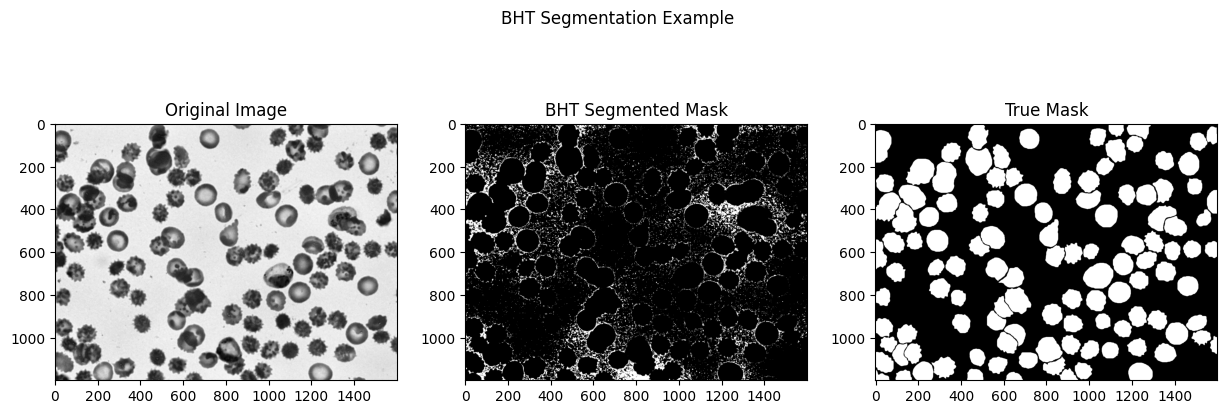

In [6]:
def show_images(original, bht_mask, true_mask, title="Segmentation Result"):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title('Original Image')
    ax[1].imshow(bht_mask, cmap='gray')
    ax[1].set_title('BHT Segmented Mask')
    ax[2].imshow(true_mask, cmap='gray')
    ax[2].set_title('True Mask')
    plt.suptitle(title)
    plt.show()

# Example: Display one of the images
test_image = cv2.imread(image_paths[0], cv2.IMREAD_GRAYSCALE)
test_bht_mask = apply_bht(test_image)
test_true_mask = cv2.imread(os.path.join(mask_folder, os.path.basename(image_paths[0])), cv2.IMREAD_GRAYSCALE)

show_images(test_image, test_bht_mask, test_true_mask, title="BHT Segmentation Example")


## Checking Shapes

In [7]:
# Paths to your directories
segmented_images_dir = '/kaggle/working/bht_segmented_masks'
masks_dir = '/kaggle/working/mask_renamed'

# Get lists of all images in both directories
segmented_images = sorted(glob(os.path.join(segmented_images_dir, '*.png')))
masks = sorted(glob(os.path.join(masks_dir, '*.png')))

# Ensure both lists have the same length
if len(segmented_images) != len(masks):
    print("The number of segmented images and masks do not match.")
else:
    for seg_image_path, mask_path in zip(segmented_images, masks):
        # Load the images as grayscale
        segmented_image = cv2.imread(seg_image_path, cv2.IMREAD_GRAYSCALE)
        mask_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Get the shapes
        segmented_shape = segmented_image.shape
        mask_shape = mask_image.shape

        # Print the shapes
        print(f"Segmented Image: {os.path.basename(seg_image_path)} - Shape: {segmented_shape}")
        print(f"Mask Image: {os.path.basename(mask_path)} - Shape: {mask_shape}")

        # Check if they are the same
        if segmented_shape == mask_shape:
            print("The segmented image and mask are of the same dimensions.")
        else:
            print("The segmented image and mask have different dimensions.")

Segmented Image: img_0001.png - Shape: (1200, 1600)
Mask Image: img_0001.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0002.png - Shape: (1200, 1600)
Mask Image: img_0002.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0003.png - Shape: (1200, 1600)
Mask Image: img_0003.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0004.png - Shape: (1200, 1600)
Mask Image: img_0004.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0005.png - Shape: (1200, 1600)
Mask Image: img_0005.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0006.png - Shape: (1200, 1600)
Mask Image: img_0006.png - Shape: (1200, 1600)
The segmented image and mask are of the same dimensions.
Segmented Image: img_0007.png - Shape: (1200, 1600)
Mask Image: 

## Defining Dice Cofficient and Jaccard Index

In [8]:
#Dice coffeciend and jaccard index methods
def dice_coef2(a, b):
    hi = a / 255
    pred = b / 255
    hi = tf.keras.backend.flatten(hi)
    pred = tf.keras.backend.flatten(pred)
    upper_part = 2 * tf.keras.backend.sum(hi * pred)
    lower_part = tf.keras.backend.sum(hi + pred)
    dice = upper_part / lower_part
    return dice.numpy()  # Convert tensor to numpy for easier readability

def jaccard_index2(a, b):
    hi = a / 255
    pred = b / 255
    hi = tf.keras.backend.flatten(hi)
    pred = tf.keras.backend.flatten(pred)
    numerator = tf.keras.backend.sum(hi * pred)
    denominator = tf.keras.backend.sum((hi + pred) - (hi * pred))
    iou = numerator / denominator
    return iou.numpy()  # Convert tensor to numpy for easier readability

## Evaluate Segmentation Performance

In [9]:
# Paths to the segmented images and ground truth masks
segmented_folder = '/kaggle/working/bht_segmented_masks'
mask_folder = '/kaggle/working/mask_renamed'

# List all the image files in the segmented folder
image_files = sorted(os.listdir(segmented_folder))
mask_files = sorted(os.listdir(mask_folder))

# Initialize variables to store total scores
total_dice_score = 0
total_iou_score = 0
num_images = len(image_files)

# Loop through each file and evaluate
for i, filename in enumerate(image_files):
    # Load the corresponding mask
    mask_path = os.path.join(mask_folder, mask_files[i])
    mask = cv2.imread(mask_path, 0)

    # Load the Otsu-segmented image
    img_path = os.path.join(segmented_folder, filename)
    segmented_image = cv2.imread(img_path, 0)

    # Calculate Dice and IoU
    dice_score = dice_coef2(segmented_image, mask)
    iou_score = jaccard_index2(segmented_image, mask)

    # Accumulate scores
    total_dice_score += dice_score
    total_iou_score += iou_score

    print(f"Image {filename} - Dice Coefficient: {dice_score:.4f}, Jaccard Index: {iou_score:.4f}")

# Calculate average scores
average_dice_score = total_dice_score / num_images if num_images > 0 else 0
average_iou_score = total_iou_score / num_images if num_images > 0 else 0

# print average scores
print(f"Average Dice Coefficient: {average_dice_score:.4f}")
print(f"Average Jaccard Index: {average_iou_score:.4f}")

Image img_0001.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0002.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0003.png - Dice Coefficient: 0.0001, Jaccard Index: 0.0000
Image img_0004.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0005.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0006.png - Dice Coefficient: 0.0004, Jaccard Index: 0.0002
Image img_0007.png - Dice Coefficient: 0.0008, Jaccard Index: 0.0004
Image img_0008.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0009.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0010.png - Dice Coefficient: 0.0004, Jaccard Index: 0.0002
Image img_0011.png - Dice Coefficient: 0.0005, Jaccard Index: 0.0002
Image img_0012.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0013.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0014.png - Dice Coefficient: 0.0000, Jaccard Index: 0.0000
Image img_0015.png - Dice Coeffici